In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [136]:
demog= pd.read_csv('/content/drive/Shareddrives/BakerRipley 2023 Datathon/demog.csv')
demog

,Unnamed: 0,VTD,Registered People,Voting People,Percentage,index,Total,Anglo,Non-Anglo,Asian,Black,Hisp,B+H,%Anglo,%Non-Anglo,%Asian,%Black,%Hispanic,%B+H
0,0,126.0,5962,3464,58.101308,255.0,"4,656","3,239","1,417",141,158,"1,001","1,155",69.6,30.4,3.0,3.4,21.5,24.8
1,1,804.0,5767,2554,44.286457,1613.0,"6,764","2,093","4,671","1,068","1,102","2,439","3,508",30.9,69.1,15.8,16.3,36.1,51.9
2,2,447.0,5754,3104,53.945082,897.0,"4,284","1,973","2,311",222,972,"1,075","2,001",46.1,53.9,5.2,22.7,25.1,46.7
3,3,336.0,5616,2463,43.856838,675.0,"7,213",605,"6,608",727,"4,147","1,769","5,823",8.4,91.6,10.1,57.5,24.5,80.7
4,4,352.0,5368,2473,46.069300,707.0,"6,590","3,434","3,156",242,385,"2,412","2,759",52.1,47.9,3.7,5.8,36.6,41.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1092,1108.0,11,3,27.272727,2221.0,464,51,413,8,303,103,394,11.0,89.0,1.7,65.3,22.2,84.9
1093,1093,918.0,7,4,57.142857,1841.0,38,14,24,0,21,4,24,36.8,63.2,0.0,55.3,10.5,63.2
1094,1094,1057.0,6,1,16.666667,2119.0,18,0,18,0,2,16,18,0.0,100.0,0.0,11.1,88.9,100.0
1095,1095,808.0,5,3,60.000000,1621.0,11,5,6,0,0,3,3,45.5,54.5,0.0,0.0,27.3,27.3


In [137]:
from sklearn.model_selection import train_test_split
features=["%Anglo", "%Non-Anglo", "%Asian", "%Black", "%Hispanic"]
label=["Percentage"]

In [138]:
X=demog[features]
Y=demog[label]

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.3, random_state=101)
X_train, X_test, Y_train, Y_test

(      %Anglo  %Non-Anglo  %Asian  %Black  %Hispanic
 1086    69.2        30.8    15.4     2.6        5.1
 463      7.6        92.4     1.4     6.1       84.9
 228     31.6        68.4    10.6    45.0       13.3
 510      1.7        98.3     0.6    73.7       24.7
 1061     3.2        96.8     0.4    35.7       57.9
 ...      ...         ...     ...     ...        ...
 575      4.0        96.0     8.6    36.8       50.5
 973      1.4        98.6     0.1    68.7       30.3
 75      58.8        41.2    15.3     8.8       15.2
 599     49.3        50.7    15.0     3.0       31.9
 863      6.8        93.2     2.3    34.3       56.2
 
 [767 rows x 5 columns],       %Anglo  %Non-Anglo  %Asian  %Black  %Hispanic
 127     50.0        50.0    12.2    18.6       17.9
 318      5.5        94.5     2.6    35.5       57.2
 1038     3.6        96.4     0.2     2.9       93.2
 852      6.1        93.9     0.5     1.5       91.6
 99      36.3        63.7    21.3     8.9       32.7
 ...      ...       

In [141]:
X_train= X_train.fillna(0)
X_train.shape

(767, 5)

In [142]:
Y_train=Y_train.fillna(0)
Y_train.shape

(767, 1)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [143]:
scaler.fit(X_train)

StandardScaler()

In [144]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [146]:
Y_train.shape

(767, 1)

In [147]:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [148]:
linear_model.coef_

array([[ 8.31854931,  4.7422543 , -0.52127864, -4.07695662, -8.1439995 ]])

In [149]:
pd.DataFrame(linear_model.coef_[0],X.columns,columns=['Coeff'])

,Coeff
%Anglo,8.318549
%Non-Anglo,4.742254
%Asian,-0.521279
%Black,-4.076957
%Hispanic,-8.143999


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

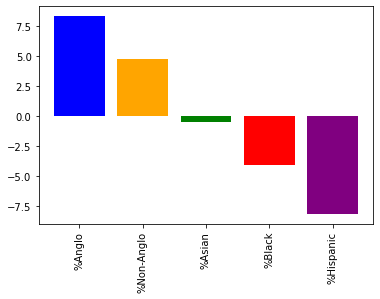

In [163]:
cols = X.columns
plt.bar(cols, linear_model.coef_[0], color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xticks(rotation = 90)